In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [102]:
df=pd.read_csv('/kaggle/input/retail-data/new_retail_data.csv')

In [103]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

## Suppression des attributs inutiles pour l'apprentissage

In [84]:
df['Date'].head()

0     9/18/2023
1    12/31/2023
2     4/26/2023
3      5/8/2023
4     1/10/2024
Name: Date, dtype: object

In [104]:
df=df.drop(columns=['Year','Transaction_ID','Customer_ID','Name','Email','Phone','Month'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Address           301695 non-null  object 
 1   City              301762 non-null  object 
 2   State             301729 non-null  object 
 3   Zipcode           301670 non-null  float64
 4   Country           301739 non-null  object 
 5   Age               301837 non-null  float64
 6   Gender            301693 non-null  object 
 7   Income            301720 non-null  object 
 8   Customer_Segment  301795 non-null  object 
 9   Date              301651 non-null  object 
 10  Time              301660 non-null  object 
 11  Total_Purchases   301649 non-null  float64
 12  Amount            301653 non-null  float64
 13  Total_Amount      301660 non-null  float64
 14  Product_Category  301727 non-null  object 
 15  Product_Brand     301729 non-null  object 
 16  Product_Type      30

## Data preprocessing

In [87]:
print(df.isnull().sum())

Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


In [105]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = [
    'City', 'State', 'Country', 'Gender', 'Customer_Segment', 
    'Product_Category', 'Product_Brand', 'Product_Type', 
    'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'products','Income'
]

for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure data type is string
    df[col] = label_encoder.fit_transform(df[col])




In [89]:
df.head()

,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,3959 Amanda Burgs,35,4,77985.0,2,21.0,1,1,2,9/18/2023,...,324.086270,1,10,23,2,1,2,3,5.0,86
1,82072 Dawn Centers,87,9,99071.0,3,19.0,0,1,1,12/31/2023,...,806.707815,2,14,28,2,2,1,2,4.0,164
2,4133 Young Canyon,46,33,75929.0,0,48.0,1,1,2,4/26/2023,...,1063.432799,0,11,3,0,1,1,2,2.0,268
3,8148 Thomas Creek Suite 100,40,39,88420.0,1,56.0,1,0,1,5/8/2023,...,2466.854021,4,6,31,2,2,3,2,4.0,301
4,5813 Lori Ports Suite 269,20,9,48704.0,3,22.0,1,1,1,1/10/2024,...,248.553049,3,9,4,1,2,0,3,1.0,58


In [106]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [112]:
df=df.drop(columns=['Date'])

In [92]:
df['Time']

0         22:03:55
1          8:42:04
2          4:06:29
3         14:55:17
4         16:54:07
            ...   
302005    23:40:29
302006     2:55:45
302007     2:43:49
302008    11:20:31
302009    11:44:36
Name: Time, Length: 302010, dtype: object

In [107]:
df['Time']=pd.to_datetime(df[time_column], format='%H:%M:%S', errors='coerce')

In [108]:
df['Hour'] = df[time_column].apply(lambda x: x.hour if pd.notna(x) else None)
df['Minute'] = df[time_column].apply(lambda x: x.minute if pd.notna(x) else None)

In [109]:
df['IsMorning'] = df['Hour'].apply(lambda x: 1 if x < 12 else 0)  # Morning: 0-11
df['IsAfternoon'] = df['Hour'].apply(lambda x: 1 if 12 <= x < 18 else 0)  # Afternoon: 12-17
df['IsEvening'] = df['Hour'].apply(lambda x: 1 if 18 <= x < 24 else 0)  # Evening: 18-23


In [113]:
df.head()

,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Total_Purchases,...,Year,Month,Day,DayOfWeek,IsWeekend,Hour,Minute,IsMorning,IsAfternoon,IsEvening
0,3959 Amanda Burgs,35,4,77985.0,2,21.0,1,1,2,3.0,...,2023.0,9.0,18.0,0.0,0,22.0,3.0,0,0,1
1,82072 Dawn Centers,87,9,99071.0,3,19.0,0,1,1,2.0,...,2023.0,12.0,31.0,6.0,1,8.0,42.0,1,0,0
2,4133 Young Canyon,46,33,75929.0,0,48.0,1,1,2,3.0,...,2023.0,4.0,26.0,2.0,0,4.0,6.0,1,0,0
3,8148 Thomas Creek Suite 100,40,39,88420.0,1,56.0,1,0,1,7.0,...,2023.0,5.0,8.0,0.0,0,14.0,55.0,0,1,0
4,5813 Lori Ports Suite 269,20,9,48704.0,3,22.0,1,1,1,2.0,...,2024.0,1.0,10.0,2.0,0,16.0,54.0,0,1,0


In [111]:
df=df.drop(columns=['Time'])

In [114]:
unique_addresses_count = df['Address'].nunique(dropna=True)  # dropna=True excludes NaN values

print("Number of unique addresses:", unique_addresses_count)

Number of unique addresses: 299329


In [127]:
df=df.drop(columns=['Address'])

In [128]:
df.head()

,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Total_Purchases,Amount,...,Year,Month,Day,DayOfWeek,IsWeekend,Hour,Minute,IsMorning,IsAfternoon,IsEvening
0,35,4,77985.0,2,21.0,1,1,2,3.0,108.028757,...,2023.0,9.0,18.0,0.0,0,22.0,3.0,0,0,1
1,87,9,99071.0,3,19.0,0,1,1,2.0,403.353907,...,2023.0,12.0,31.0,6.0,1,8.0,42.0,1,0,0
2,46,33,75929.0,0,48.0,1,1,2,3.0,354.477600,...,2023.0,4.0,26.0,2.0,0,4.0,6.0,1,0,0
3,40,39,88420.0,1,56.0,1,0,1,7.0,352.407717,...,2023.0,5.0,8.0,0.0,0,14.0,55.0,0,1,0
4,20,9,48704.0,3,22.0,1,1,1,2.0,124.276524,...,2024.0,1.0,10.0,2.0,0,16.0,54.0,0,1,0


In [133]:
df.isna().sum()

City                  0
State                 0
Zipcode             340
Country               0
Age                 173
Gender                0
Income                0
Customer_Segment      0
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings             184
products              0
Year                359
Month               359
Day                 359
DayOfWeek           359
IsWeekend             0
Hour                350
Minute              350
IsMorning             0
IsAfternoon           0
IsEvening             0
dtype: int64

In [134]:
mean_columns = ['Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']

mode_columns = ['Year', 'Month', 'Day', 'DayOfWeek','Hour', 'Minute','Age','Zipcode']

#La moyenne
df[mean_columns] = df[mean_columns].apply(lambda col: col.fillna(col.mean()))

# Valeur la plus occurante
df[mode_columns] = df[mode_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [135]:
df.isna().sum()

City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
Year                0
Month               0
Day                 0
DayOfWeek           0
IsWeekend           0
Hour                0
Minute              0
IsMorning           0
IsAfternoon         0
IsEvening           0
dtype: int64

## Principal Component Analysis

#### Normalisation

In [144]:
import pandas as pd


pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
print(df.head(30))

    City  State  Zipcode  Country   Age  Gender  Income  Customer_Segment  \
0     35      4  77985.0        2  21.0       1       1                 2   
1     87      9  99071.0        3  19.0       0       1                 1   
2     46     33  75929.0        0  48.0       1       1                 2   
3     40     39  88420.0        1  56.0       1       0                 1   
4     20      9  48704.0        3  22.0       1       1                 1   
5     19     33  74430.0        0  58.0       0       2                 1   
6     60     39  47545.0        1  29.0       0       1                 0   
7     80      4  86862.0        2  29.0       1       2                 1   
8    128     33  39820.0        0  46.0       1       2                 0   
9     28      4  64317.0        2  25.0       1       2                 0   
10   100      9  59280.0        3  64.0       0       1                 2   
11   100      9  91253.0        3  31.0       0       2                 2   

In [160]:
from sklearn.preprocessing import StandardScaler
unnormalized_columns = ['City', 'State', 'Zipcode', 'Country', 'Age', 'Income',
                        'Customer_Segment', 'Total_Purchases', 'Amount', 'Total_Amount',
                        'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
                        'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings',
                        'products', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'Minute']
normalized_columns = ['IsWeekend', 'IsMorning', 'IsAfternoon', 'IsEvening','Gender']


scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[unnormalized_columns])

df_combined = np.hstack((df_standardized, df[normalized_columns].values))

In [161]:
X=np.array(df_combined)

In [162]:
X.shape

(302010, 30)

In [172]:
X=np.array(X)

#### Covariance

In [173]:
cov_matrix = np.cov(X, rowvar=False)

In [174]:
from numpy.linalg import eig
(valeurs_propres,vecteurs_propres)=eig(cov_matrix)
valeurs_propres.shape

(30,)

In [175]:
pourcentage_information=(valeurs_propres / valeurs_propres.sum())*100
pourcentage_information

array([7.41982919e+00, 6.75664512e+00, 6.32289598e+00, 5.87167006e+00,
       1.47719667e-03, 1.61009381e-01, 2.60291870e-01, 2.57972487e-01,
       9.02957778e-01, 1.00755593e+00, 1.40436585e+00, 1.36240240e+00,
       1.98616556e+00, 5.06458522e+00, 4.90850364e+00, 4.89395354e+00,
       2.81733892e+00, 3.01909161e+00, 4.35460470e+00, 3.34810970e+00,
       3.48926197e+00, 3.62870201e+00, 3.93942144e+00, 3.74602987e+00,
       3.91199179e+00, 3.81556957e+00, 3.81776924e+00, 3.82897568e+00,
       3.84753391e+00, 3.85331839e+00])

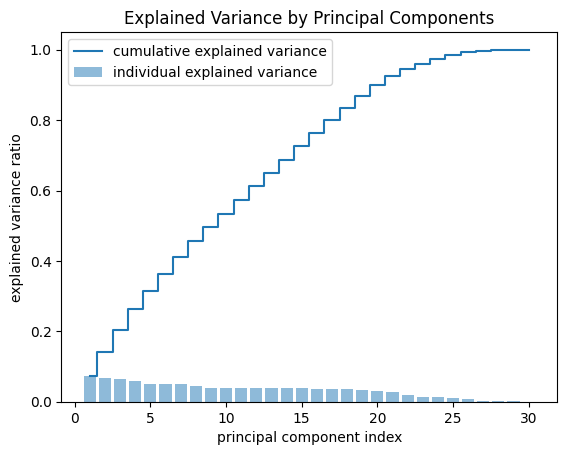

In [179]:
import matplotlib.pyplot as plt
tot = sum(valeurs_propres)

# Computing the explained variance for each principal component
var_exp = [i / tot for i in sorted(valeurs_propres, reverse=True)]

# Calculating the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# Plotting the explained variance
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()
